We want to fit some data to the following form.
$$ y = mx + b
$$

# Import libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data

We are generating in a way that may seem arbitrary. We will be using an enhanced model in the next part of the lecture and employing the same data generation method.

In [15]:
# Seed for reproducibility
np.random.seed(42)

# Generate 10 random x values within a range
x_generated = np.linspace(0, 5, 10)

# Parameters for the function (can use the previously fitted values or set randomly)
n_true = 0.06
a_true = 0.25
m_true = 0.57
b_true = 0.11

# Generate corresponding y values based on the function with added noise
noise = 0.001 * np.random.normal(0, 0.1, size=x_generated.shape)  # Add Gaussian noise
y_generated = n_true * np.exp(-a_true * (m_true * x_generated + b_true) ** 2) + noise

# Display the generated x and y arrays
x_generated, y_generated

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([0.05986845, 0.05731671, 0.05232358, 0.04545853, 0.03733439,
        0.02927403, 0.02201051, 0.01557923, 0.01041288, 0.00676658]))

# Gradient Descent and Backpropagation

$$
\text{Loss}(m, b) = \frac{1}{N} \sum_{i=1}^N \left( y_i - (m \cdot x_i + b) \right)^2
$$

In [16]:
def compute_loss(x, y, m, b):
    """
    Compute the Mean Squared Error (MSE) loss for the linear function y = mx + b.

    Parameters:
    x : np.array
        Input data points (x values).
    y : np.array
        Actual output data points (y values).
    m, b : float
        Parameters of the linear function.

    Returns:
    float
        Mean Squared Error (MSE) loss.
    """
    y_pred = m * x + b
    return np.mean((y - y_pred) ** 2)

**Gradients of the loss function**
$$
\frac{\partial \text{Loss}}{\partial m} = -\frac{2}{N} \sum_{i=1}^N x_i \cdot \left( y_i - (m \cdot x_i + b) \right)
$$

$$
\frac{\partial \text{Loss}}{\partial b} = -\frac{2}{N} \sum_{i=1}^N \left( y_i - (m \cdot x_i + b) \right)
$$

**Parameter updates**

$$
m \leftarrow m - \eta \frac{\partial \text{Loss}}{\partial m}, \quad b \leftarrow b - \eta \frac{\partial \text{Loss}}{\partial b}
$$

In [17]:
# Generate data points directly as NumPy arrays (without pandas)
x_data = x_generated
y_data = y_generated

# Reinitialize parameters (n, a, m, b)
m_fit = np.random.rand()
b_fit = np.random.rand()

epochs = 100000
learning_rate = 0.00001

loss = []

# Perform gradient descent for the generated data
for epoch in range(epochs):
    # Forward pass: compute predicted outputs
    y_pred_fit = m_fit * x_data + b_fit

    # Compute gradients
    grad_m_fit = -2 * np.mean((y_data - y_pred_fit) * x_data)
    grad_b_fit = -2 * np.mean(y_data - y_pred_fit)

    # Update parameters
    m_fit -= learning_rate * grad_m_fit
    b_fit -= learning_rate * grad_b_fit

    # Compute loss for monitoring
    loss_fit = compute_loss(x_data, y_data, m_fit, b_fit)

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss_fit:.20f}")

    loss.append(loss_fit)

# Final fitted parameter values
print(min(loss))
m_fit, b_fit

Epoch 0: Loss = 0.46036524232994507910
Epoch 1000: Loss = 0.31475763748976537393
Epoch 2000: Loss = 0.21529832551275074337
Epoch 3000: Loss = 0.14736024777795173057
Epoch 4000: Loss = 0.10095251577476757610
Epoch 5000: Loss = 0.06925093760814458876
Epoch 6000: Loss = 0.04759430661044968675
Epoch 7000: Loss = 0.03279882480386715760
Epoch 8000: Loss = 0.02268982567002158710
Epoch 9000: Loss = 0.01578192136554325622
Epoch 10000: Loss = 0.01106052999463024746
Epoch 11000: Loss = 0.00783264966836393420
Epoch 12000: Loss = 0.00562493099349518216
Epoch 13000: Loss = 0.00411405635170154684
Epoch 14000: Loss = 0.00307918605764268384
Epoch 15000: Loss = 0.00236947711113208491
Epoch 16000: Loss = 0.00188189715668418797
Epoch 17000: Loss = 0.00154607049700685112
Epoch 18000: Loss = 0.00131392729120718066
Epoch 19000: Loss = 0.00115263352751504046
Epoch 20000: Loss = 0.00103976190117279323
Epoch 21000: Loss = 0.00095999332356356377
Epoch 22000: Loss = 0.00090286391600517704
Epoch 23000: Loss = 0.00

(-0.021765727151910046, 0.09726613571271642)

# Visualization

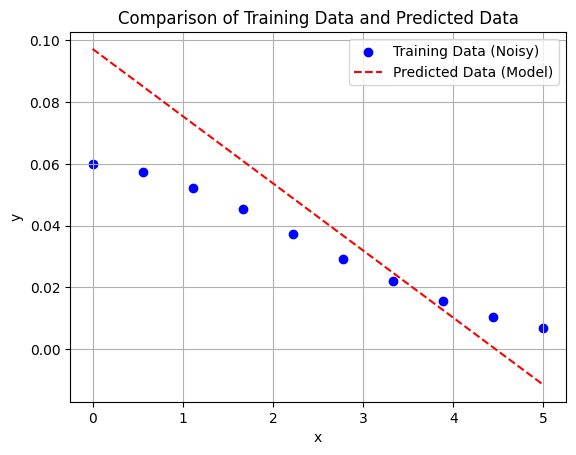

In [18]:
# Predicted y values using the fitted parameters
y_predicted = m_fit * x_generated + b_fit

# Plot the training data
plt.scatter(x_generated, y_generated, color='blue', label='Training Data (Noisy)', marker='o')

# Plot the predicted data
plt.plot(x_generated, y_predicted, color='red', label='Predicted Data (Model)', linestyle='--')

# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Training Data and Predicted Data")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()